In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
pd.set_option('mode.chained_assignment', None)

In [ ]:
data=pd.read_csv("USA_Ren_Gen.csv")
data.drop(columns="Unnamed: 0",inplace=True)

Source of data set: [USA RENEWABLE & NON_RENEWABLE GENERATION](https://www.eia.gov/electricity/)

In [ ]:
data.head()

,YEAR,MONTH,STATE,TYPE OF PRODUCER,ENERGY SOURCE,GENERATION (Megawatthours)
0,2001,1,AK,Total Electric Power Industry,Coal,46903.0
1,2001,1,AK,Total Electric Power Industry,Petroleum,71085.0
2,2001,1,AK,Total Electric Power Industry,Natural Gas,367521.0
3,2001,1,AK,Total Electric Power Industry,Hydroelectric Conventional,104549.0
4,2001,1,AK,Total Electric Power Industry,Wind,87.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 496774 entries, 0 to 496773
Data columns (total 6 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   YEAR                        496774 non-null  int64  
 1   MONTH                       496774 non-null  int64  
 2   STATE                       496774 non-null  object 
 3   TYPE OF PRODUCER            496774 non-null  object 
 4   ENERGY SOURCE               496774 non-null  object 
 5   GENERATION (Megawatthours)  496774 non-null  float64
dtypes: float64(1), int64(2), object(3)
memory usage: 22.7+ MB


In [ ]:
data.describe()

,YEAR,MONTH,GENERATION (Megawatthours)
count,496774.000000,496774.000000,4.967740e+05
mean,2011.649768,6.431452,1.393384e+06
std,6.168041,3.458944,1.078685e+07
min,2001.000000,1.000000,-9.978550e+05
25%,2006.000000,3.000000,1.643000e+03
50%,2012.000000,6.000000,2.330103e+04
75%,2017.000000,9.000000,2.792042e+05
max,2022.000000,12.000000,4.217967e+08


In [ ]:
for i in data.columns[:-1]:
    print(i + ": ",  data[i].unique(), "Total Values:", len(data[i].unique()))

YEAR:  [2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014
 2015 2016 2017 2018 2019 2020 2021 2022] Total Values: 22
MONTH:  [ 1  2  3  4  5  6  7  8  9 10 11 12] Total Values: 12
STATE:  ['AK' 'AL' 'AR' 'AZ' 'CA' 'CO' 'CT' 'DC' 'DE' 'FL' 'GA' 'HI' 'IA' 'ID'
 'IL' 'IN' 'KS' 'KY' 'LA' 'MA' 'MD' 'ME' 'MI' 'MN' 'MO' 'MS' 'MT' 'NC'
 'ND' 'NE' 'NH' 'NJ' 'NM' 'NV' 'NY' 'OH' 'OK' 'OR' 'PA' 'RI' 'SC' 'SD'
 'TN' 'TX' 'UT' 'VA' 'VT' 'WA' 'WI' 'WV' 'WY' 'US-TOTAL'] Total Values: 52
TYPE OF PRODUCER:  ['Total Electric Power Industry' 'Electric Generators, Electric Utilities'
 'Combined Heat and Power, Electric Power'
 'Combined Heat and Power, Commercial Power'
 'Combined Heat and Power, Industrial Power'
 'Electric Generators, Independent Power Producers'] Total Values: 6
ENERGY SOURCE:  ['Coal' 'Petroleum' 'Natural Gas' 'Hydroelectric Conventional' 'Wind'
 'Total' 'Other Gases' 'Nuclear' 'Wood and Wood Derived Fuels'
 'Other Biomass' 'Other' 'Solar Thermal and Photovoltaic' '

In [ ]:

data["Date"]=pd.to_datetime(dict(year=data["YEAR"],month=data["MONTH"],day=1))
data=data.set_index("Date")
data.drop(columns=["YEAR","MONTH"],inplace=True)
data

,STATE,TYPE OF PRODUCER,ENERGY SOURCE,GENERATION (Megawatthours)
Date,,,,
2001-01-01,AK,Total Electric Power Industry,Coal,46903.0
2001-01-01,AK,Total Electric Power Industry,Petroleum,71085.0
2001-01-01,AK,Total Electric Power Industry,Natural Gas,367521.0
2001-01-01,AK,Total Electric Power Industry,Hydroelectric Conventional,104549.0
2001-01-01,AK,Total Electric Power Industry,Wind,87.0
...,...,...,...,...
2022-05-01,WY,"Electric Generators, Electric Utilities",Coal,2071403.0
2022-05-01,WY,"Electric Generators, Electric Utilities",Hydroelectric Conventional,96790.0
2022-05-01,WY,"Electric Generators, Electric Utilities",Natural Gas,91570.0


In [ ]:

total_gen=data[data["STATE"]=="US-TOTAL"]
total_gen=total_gen[(total_gen["TYPE OF PRODUCER"]!="Total Electric Power Industry") &
                    (total_gen["ENERGY SOURCE"]!="Total") ]

In [ ]:
plot1=total_gen.groupby(by=["Date","TYPE OF PRODUCER"]).sum().reset_index()
plot1

<ipython-input-9-c62ca592c2e2>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  plot1=total_gen.groupby(by=["Date","TYPE OF PRODUCER"]).sum().reset_index()


,Date,TYPE OF PRODUCER,GENERATION (Megawatthours)
0,2001-01-01,"Combined Heat and Power, Commercial Power",628822.0
1,2001-01-01,"Combined Heat and Power, Electric Power",14110257.0
2,2001-01-01,"Combined Heat and Power, Industrial Power",13127989.0
3,2001-01-01,"Electric Generators, Electric Utilities",236467267.0
4,2001-01-01,"Electric Generators, Independent Power Producers",68158826.0
...,...,...,...
1280,2022-05-01,"Combined Heat and Power, Commercial Power",1046962.0
1281,2022-05-01,"Combined Heat and Power, Electric Power",9892998.0
1282,2022-05-01,"Combined Heat and Power, Industrial Power",11341483.0
1283,2022-05-01,"Electric Generators, Electric Utilities",178099898.0


In [ ]:
plot1["Generation (TWh)"]=plot1["GENERATION (Megawatthours)"]/1000000
plot1["Generation (TWh)"]

0         0.628822
1        14.110257
2        13.127989
3       236.467267
4        68.158826
           ...    
1280      1.046962
1281      9.892998
1282     11.341483
1283    178.099898
1284    143.120850
Name: Generation (TWh), Length: 1285, dtype: float64

In [ ]:
plot2=total_gen.groupby(by=["Date","ENERGY SOURCE"]).sum().reset_index()
plot2

<ipython-input-11-89ddb69909ce>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  plot2=total_gen.groupby(by=["Date","ENERGY SOURCE"]).sum().reset_index()


,Date,ENERGY SOURCE,GENERATION (Megawatthours)
0,2001-01-01,Coal,177287111.0
1,2001-01-01,Geothermal,1229325.0
2,2001-01-01,Hydroelectric Conventional,18852048.0
3,2001-01-01,Natural Gas,42388663.0
4,2001-01-01,Nuclear,68707077.0
...,...,...,...
3336,2022-05-01,Petroleum,1524489.0
3337,2022-05-01,Pumped Storage,-466746.0
3338,2022-05-01,Solar Thermal and Photovoltaic,15151119.0
3339,2022-05-01,Wind,41891907.0


In [ ]:
plot2["Generation (TWh)"]=plot2["GENERATION (Megawatthours)"]/1000000
plot2["Generation (TWh)"]

0       177.287111
1         1.229325
2        18.852048
3        42.388663
4        68.707077
           ...    
3336      1.524489
3337     -0.466746
3338     15.151119
3339     41.891907
3340      3.073482
Name: Generation (TWh), Length: 3341, dtype: float64

In [ ]:
significant=plot2.groupby(by="ENERGY SOURCE").sum()["Generation (TWh)"].reset_index()
total_generation=significant.sort_values("Generation (TWh)",ascending=False)
total_generation

<ipython-input-14-79c1c925e9fd>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  significant=plot2.groupby(by="ENERGY SOURCE").sum()["Generation (TWh)"].reset_index()


,ENERGY SOURCE,Generation (TWh)
0,Coal,33732.520514
3,Natural Gas,23302.291894
4,Nuclear,16941.041304
2,Hydroelectric Conventional,5808.074351
11,Wind,3120.791677
8,Petroleum,1108.598171
12,Wood and Wood Derived Fuels,826.754395
10,Solar Thermal and Photovoltaic,551.950863
6,Other Biomass,393.971701
1,Geothermal,327.687308


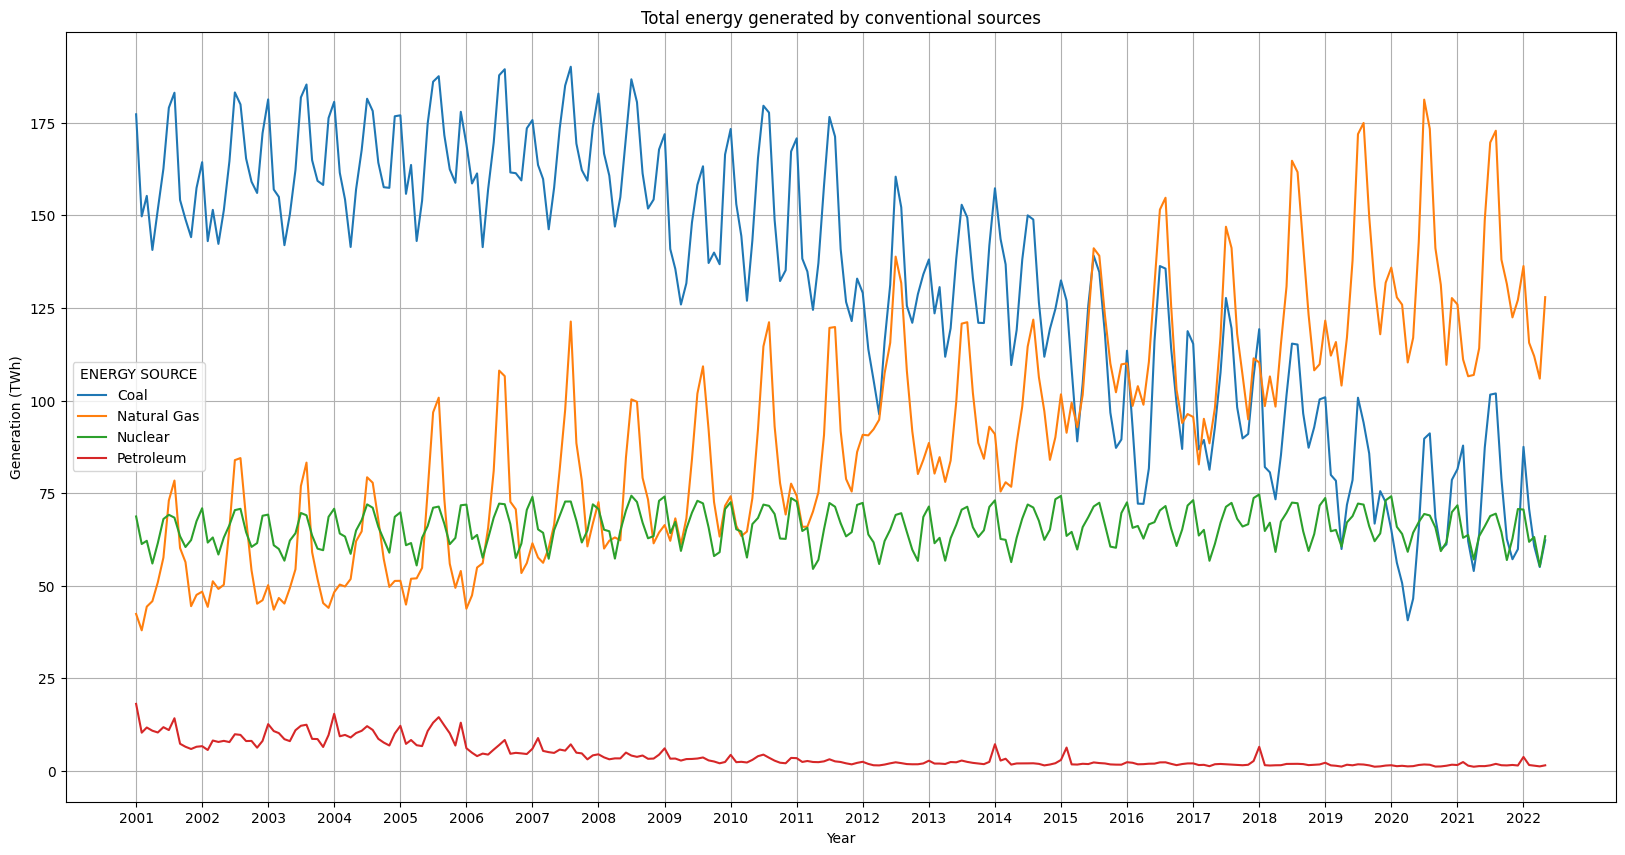

In [ ]:
conventional=["Coal","Natural Gas","Nuclear","Petroleum"]
#Figsize
plt.figure(figsize=(20,10))
#Seaborn style
sns.color_palette("tab10")
#Plot - using mdates for correct datetime format
sns.lineplot(data=plot2[plot2["ENERGY SOURCE"].isin(conventional)],
                x="Date",y="Generation (TWh)",hue="ENERGY SOURCE").xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
#Plot additional properties
plt.grid()
plt.xticks([str(i+2001)+"-01-01" for i in range(22)])
plt.title("Total energy generated by conventional sources")
plt.xlabel("Year");

Interpretation: Here is a Simple line graph or a time series plot for the amount of energy generated in Twh vs the time component which is year. The various lines shows the trend of various energy sources.  

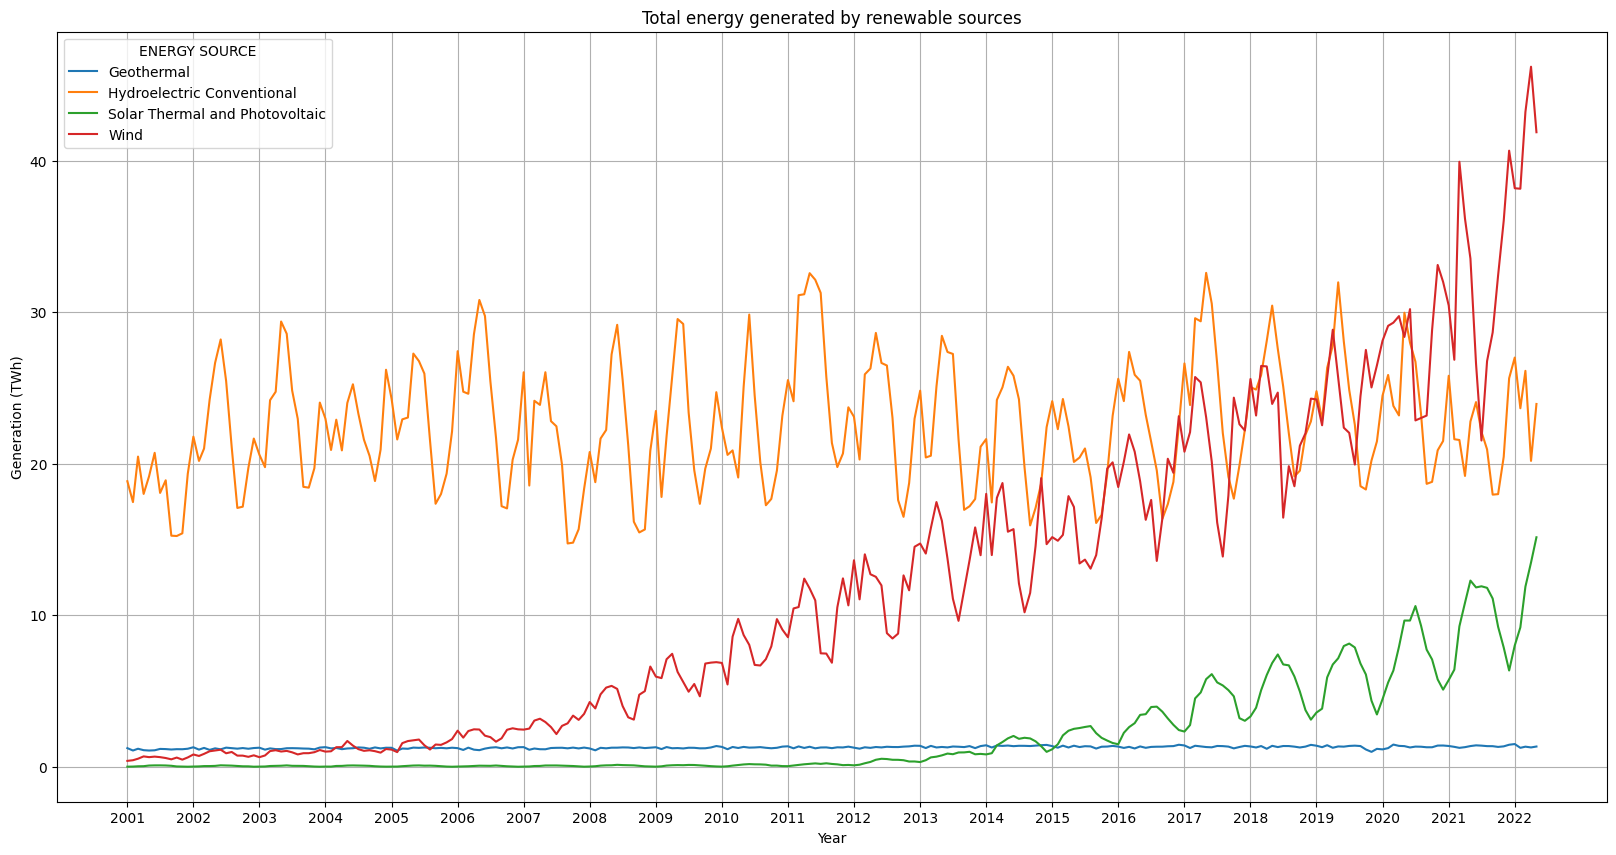

In [ ]:
renewable=["Hydroelectric Conventional","Solar Thermal and Photovoltaic", "Wind","Geothermal"]
#Figsize
plt.figure(figsize=(20,10))
#Seaborn style
sns.color_palette("tab10")
#Plot - using mdates for correct datetime format
sns.lineplot(data=plot2[plot2["ENERGY SOURCE"].isin(renewable)],
                x="Date",y="Generation (TWh)",hue="ENERGY SOURCE").xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
#Plot additional properties
plt.grid()
plt.xticks([str(i+2001)+"-01-01" for i in range(22)])
plt.title("Total energy generated by renewable sources")
plt.xlabel("Year");

Interpretation: Here is a Simple line graph or a time series plot for the amount of renewable energy generated in Twh vs the time component which is year. The various lines shows the trend of various re nenewable energy sources.  

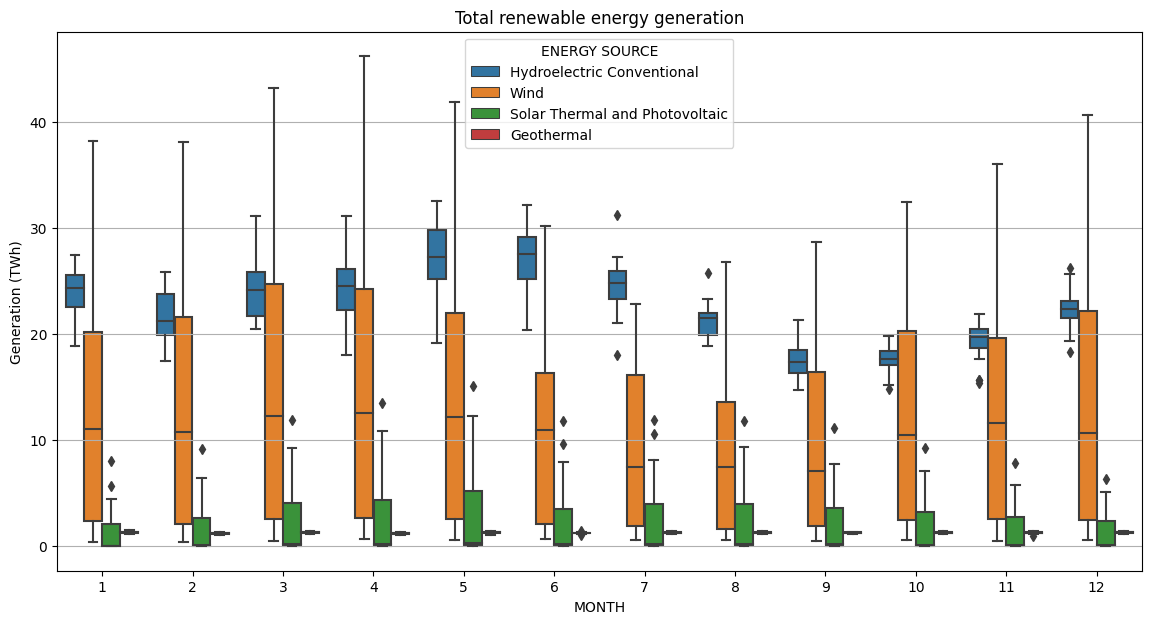

In [ ]:
#Data filtering
total_dist=data[(data["STATE"]=="US-TOTAL") & (data["ENERGY SOURCE"].isin(renewable)) &
                (data["TYPE OF PRODUCER"]=="Total Electric Power Industry")]
#Creating a column with the month data
total_dist["MONTH"]=total_dist.index.month
#Energy convertion
total_dist["Generation (TWh)"]= total_dist["GENERATION (Megawatthours)"]/1000000
#Plotting
plt.figure(figsize=(14,7))
plt.grid()
#Boxplot
sns.boxplot(data=total_dist,x="MONTH",y="Generation (TWh)",hue="ENERGY SOURCE")
plt.title("Total renewable energy generation");

Interpretation: The following is a visualization of the amount of energy generated in TWh using non-conventional energy sources vs the monthly time stamps of the energy generated.

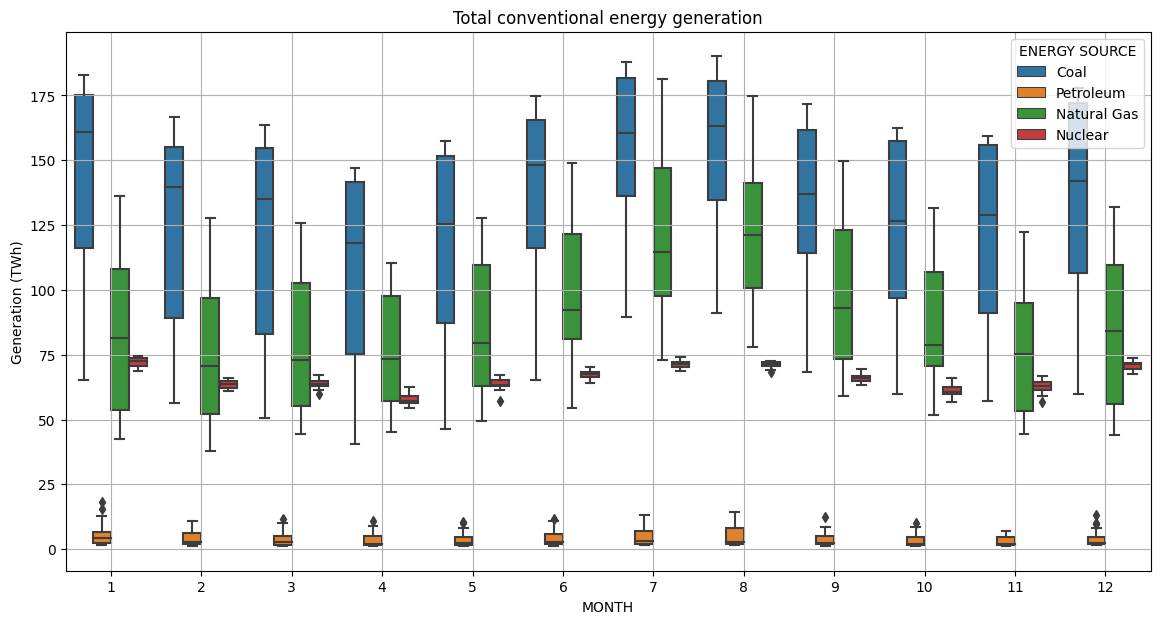

In [ ]:
#Data filtering
total_dist=data[(data["STATE"]=="US-TOTAL") & (data["ENERGY SOURCE"].isin(conventional)) & (data["TYPE OF PRODUCER"]=="Total Electric Power Industry")]
#Creating a column with the month data
total_dist["MONTH"]=total_dist.index.month
#Energy convertion
total_dist["Generation (TWh)"]= total_dist["GENERATION (Megawatthours)"]/1000000
#Plotting
plt.figure(figsize=(14,7))
#Boxplot
sns.boxplot(data=total_dist,x="MONTH",y="Generation (TWh)",hue="ENERGY SOURCE")
plt.grid()
plt.title("Total conventional energy generation");

Interpretation: The following is a visualization of the amount of energy generated in TWh using conventional energy sources vs the monthly time stamps of the energy generated.